In [5]:
import numpy as np
from PIL import Image
import glob

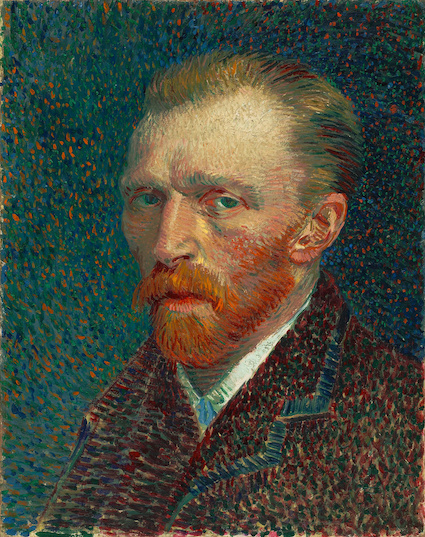

In [6]:
# Image 불러오기
file = "./Data/VanGogh.jpg"
img1 = Image.open(file)
img1

In [7]:
# 해상도 확인
print(np.array(Image.open(file),dtype=np.int32).shape)

(537, 425, 3)


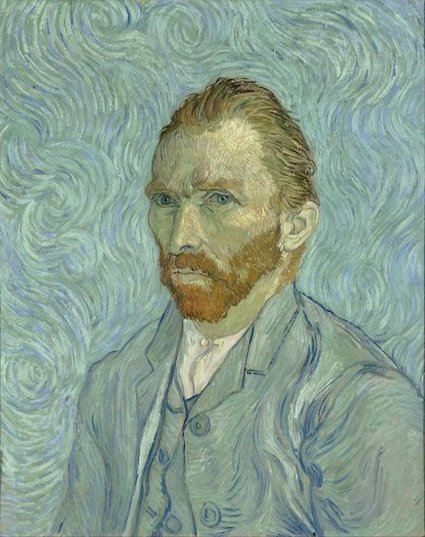

In [8]:
# Image 불러오기
file = "./Data/VanGogh2.jpg"
img2 = Image.open(file)
img2

In [9]:
# 해상도 확인
print(np.array(Image.open(file),dtype=np.int32).shape)

(537, 425, 3)


In [10]:
# vangogh의 유사 이미지 만들기

fileCount = 0
image_w = 425
image_h = 537

for angle in range(-30, 30, 1):
    # 회전 데이터 추가
    img11 = img1.rotate(angle)
    img11.save("./Data/vangogh/image_%03d.jpg"%(fileCount),"JPEG")
    fileCount += 1
    # 반전 데이터 추가
    img111 = img1.transpose(Image.FLIP_LEFT_RIGHT)
    img111.save("./Data/vangogh/image_%03d.jpg"%(fileCount),"JPEG")
    fileCount += 1

for angle in range(-30, 30, 1):
    # 회전 데이터 추가
    img11 = img2.rotate(angle)
    img11.save("./Data/vangogh/image_%03d.jpg"%(fileCount),"JPEG")
    fileCount += 1
    # 반전 데이터 추가
    img111 = img1.transpose(Image.FLIP_LEFT_RIGHT)
    img111.save("./Data/vangogh/image_%03d.jpg"%(fileCount),"JPEG")
    fileCount += 1



In [17]:
# 현재 이미지를 Gray로 변경
fileCount = 0

for file in sorted(glob.glob("./Data/vangogh/*.jpg")):
    img = Image.open(file)
    imgResize = img.convert('L')
    imgResize.save("./Data/vangogh/gray/image_%03d.jpg"%fileCount, "JPEG")
    fileCount+=1

#### 사진들을 numpy배열을 이용하여 Training Data 만들기


In [13]:
img_width_size = 425
img_height_size = 537
number_of_data = 240

In [18]:
train = np.zeros(number_of_data*img_height_size*img_width_size,dtype=np.int32).reshape(number_of_data,img_height_size,img_width_size)
i = 0
for file in sorted(glob.glob("./Data/vangogh/gray/*.jpg")):
    img = np.array(Image.open(file),dtype=np.int32)
    train[i,:,:] = img
    i+=1

In [19]:
train.shape

(240, 537, 425)

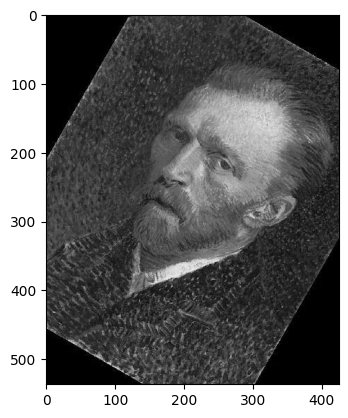

In [22]:
# 이미지 확인하기
import matplotlib.pyplot as plt
plt.imshow(train[0].reshape(537,425),cmap='gray')
plt.show()

### target data

In [23]:
target = np.concatenate([np.zeros(120),np.ones(120)])
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

### train과 test로 분류

In [24]:
# 표준화
train = train.reshape(-1,537,425,1)/255.0

In [25]:
from sklearn.model_selection import train_test_split

In [28]:
trainData, valData, trainTargetData, valTargetData = train_test_split(train, target,test_size=0.2, random_state=42)

In [29]:
print(trainData.shape)
print(valData.shape)
print(trainTargetData.shape)
print(valTargetData.shape)

(192, 537, 425, 1)
(48, 537, 425, 1)
(192,)
(48,)


### CNN 만들기

In [30]:
from tensorflow import keras

In [49]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(537,425,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [50]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(2,activation='softmax'))

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 537, 425, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 268, 212, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 268, 212, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 134, 106, 64)     0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 909056)            0         
                                                                 
 dense_4 (Dense)             (None, 100)              

In [52]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint("./Data/best_vangogh_cnn_model.h5")
earlystopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model.fit(trainData,trainTargetData,epochs=20,validation_data=[valData,valTargetData],callbacks=[checkpoint_cb,earlystopping_cb])

Epoch 1/20
6/6 [==============================] - 20s 3s/step - loss: 7.6086 - accuracy: 0.5104 - val_loss: 1.5969 - val_accuracy: 0.5000
Epoch 2/20
6/6 [==============================] - 19s 3s/step - loss: 0.9077 - accuracy: 0.7188 - val_loss: 0.5416 - val_accuracy: 0.7708
Epoch 3/20
6/6 [==============================] - 17s 3s/step - loss: 0.5969 - accuracy: 0.6875 - val_loss: 0.5682 - val_accuracy: 0.6667
Epoch 4/20
6/6 [==============================] - 17s 3s/step - loss: 0.4949 - accuracy: 0.7396 - val_loss: 0.4380 - val_accuracy: 0.7292
Epoch 5/20
6/6 [==============================] - 17s 3s/step - loss: 0.4415 - accuracy: 0.6979 - val_loss: 0.3699 - val_accuracy: 0.7292
Epoch 6/20
6/6 [==============================] - 17s 3s/step - loss: 0.3847 - accuracy: 0.7396 - val_loss: 0.3583 - val_accuracy: 0.7292
Epoch 7/20
6/6 [==============================] - 21s 3s/step - loss: 0.3533 - accuracy: 0.7552 - val_loss: 0.3519 - val_accuracy: 0.7292
Epoch 8/20
6/6 [==================

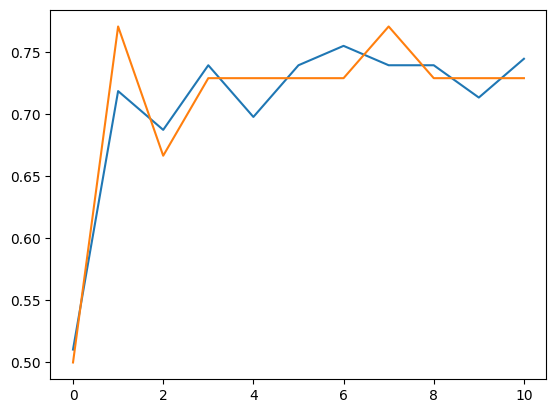

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

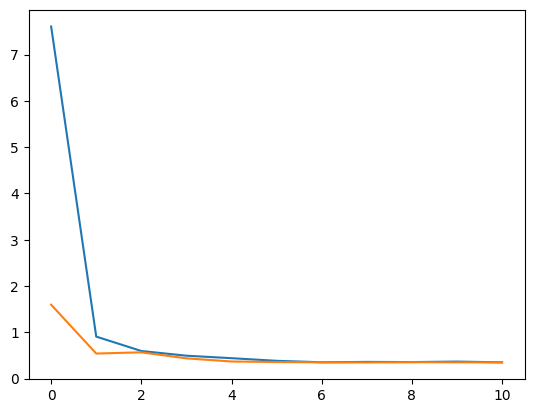

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()